In [77]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys

In [2]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugbank = [m for m in suppl if m]

- struktury ve slovniku, ktere budeme chtit najit
- pouziva se na predvyber v DB
- -> dotaz v DB -> latka obsahuje benzen -> vyhodi vse, co nema TRUE na 2. miste (benzen), atd. => urychleni

In [22]:
#slovnik ... strukturni klic (dle toho lze klastrovat, atd):
substructure = {
    'COO': Chem.MolFromSmarts('C(=O)O'),
    'benzene': Chem.MolFromSmarts('c1ccccc1'),
    'N': Chem.MolFromSmarts('[#7]'),
    'halogen': Chem.MolFromSmarts('[F,Cl,Br,I]'),
    'triple_bond': Chem.MolFromSmarts('*#*'),
    'aliphatic_c': Chem.MolFromSmarts('C'),
    'S': Chem.MolFromSmarts('S'),
    #'aromatic_c': Chem.MolFromSmarts('c'),
    #'inorganic': Chem.MolFromSmarts('[![#1];![#6];![#7];![#8];![#16];!F;!Cl;!Br;!I]')
}

#na vektor:
pattern_names = tuple(substructure.keys())
pattern_names

('COO', 'benzene', 'N', 'halogen', 'triple_bond', 'aliphatic_c', 'S')

In [23]:
def apply_substruct_key(m, name_order, pattern_dict):
    return tuple((m.HasSubstructMatch(pattern_dict[name]) for name in name_order))

In [24]:
substructure.items()

dict_items([('COO', <rdkit.Chem.rdchem.Mol object at 0x7f521ce0ae90>), ('benzene', <rdkit.Chem.rdchem.Mol object at 0x7f521ce0aee0>), ('N', <rdkit.Chem.rdchem.Mol object at 0x7f521ce0ab20>), ('halogen', <rdkit.Chem.rdchem.Mol object at 0x7f521ce0af80>), ('triple_bond', <rdkit.Chem.rdchem.Mol object at 0x7f521ce22030>), ('aliphatic_c', <rdkit.Chem.rdchem.Mol object at 0x7f521ce22080>), ('S', <rdkit.Chem.rdchem.Mol object at 0x7f521ce220d0>)])

In [28]:
apply_substruct_key(drugbank[666], pattern_names, substructure)

(True, True, True, False, False, True, False)

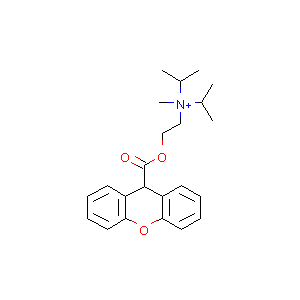

In [29]:
Draw.MolToImage(drugbank[666])

('COO', 'benzene', 'N', 'halogen', 'triple_bond', 'aliphatic_c', 'S')
(False, True, True, True, False, True, True)


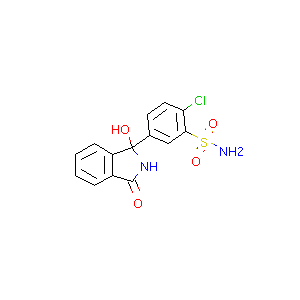

In [35]:
m = 200
print(pattern_names)
print(apply_substruct_key(drugbank[m], pattern_names, substructure))
Draw.MolToImage(drugbank[m])

('COO', 'benzene', 'N', 'halogen', 'triple_bond', 'aliphatic_c', 'S')
(True, True, True, False, False, True, False)


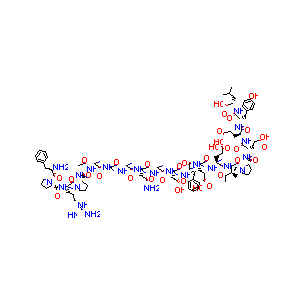

In [42]:
m = 0
print(pattern_names)
print(apply_substruct_key(drugbank[m], pattern_names, substructure))
Draw.MolToImage(drugbank[m])

In [38]:
#aplikace na cely drugbank:
custom_struct_keys = [apply_substruct_key(m, pattern_names, substructure) for m in drugbank]
len(custom_struct_keys)

7110

In [40]:
custom_struct_keys[:15]

[(True, True, True, False, False, True, False),
 (False, True, True, False, False, True, False),
 (False, True, True, False, False, True, True),
 (False, True, True, True, False, True, False),
 (False, False, True, False, False, True, False),
 (False, True, True, False, False, True, True),
 (False, True, True, False, False, True, True),
 (False, False, True, False, False, True, False),
 (False, True, True, False, True, True, False),
 (True, True, True, False, False, True, False),
 (True, False, True, False, False, True, False),
 (True, False, True, False, False, True, True),
 (True, False, False, False, False, True, False),
 (True, True, True, False, False, True, False),
 (True, False, True, False, False, True, True)]

## kolik je jakych klicu v drugbank:

In [51]:
count_struct2 = [sum(i) for i in zip(*custom_struct_keys)]
count_struct = list(map(sum,zip(*custom_struct_keys)))
print(count_struct2,count_struct, pattern_names, sep='\n')

[2397, 4286, 5679, 1637, 246, 6830, 1355]
[2397, 4286, 5679, 1637, 246, 6830, 1355]
('COO', 'benzene', 'N', 'halogen', 'triple_bond', 'aliphatic_c', 'S')


## nakreslit aspirin a najit molekuly se stejnym strukturnim klicem v drugbank

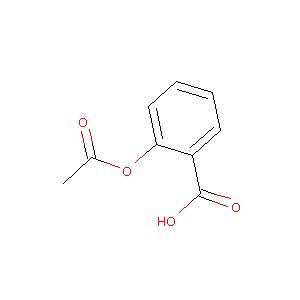

In [53]:
aspirine = Chem.MolFromSmiles("O=C(C)Oc1ccccc1C(=O)O")
Draw.MolToImage(aspirine)

In [55]:
aspirine_key = apply_substruct_key(aspirine, pattern_names, substructure)
aspirine_key

(True, True, False, False, False, True, False)

In [56]:
aspirine_key_hits = [i for i, key in enumerate(custom_struct_keys) if key == aspirine_key]
aspirine_key_hits

[101,
 197,
 263,
 331,
 346,
 458,
 539,
 561,
 578,
 657,
 671,
 752,
 806,
 815,
 824,
 862,
 881,
 887,
 902,
 927,
 1054,
 1115,
 1150,
 1212,
 1213,
 1384,
 1427,
 1433,
 1444,
 1450,
 1453,
 1454,
 1461,
 1480,
 1482,
 1523,
 1637,
 1744,
 1761,
 1766,
 1788,
 1859,
 1863,
 1884,
 1966,
 1993,
 1994,
 2148,
 2163,
 2188,
 2197,
 2208,
 2281,
 2406,
 2416,
 2421,
 2423,
 2462,
 2503,
 2523,
 2538,
 2679,
 2771,
 2835,
 2970,
 3005,
 3065,
 3170,
 3258,
 3352,
 3357,
 3442,
 3455,
 3501,
 3526,
 3598,
 3611,
 3613,
 3625,
 3732,
 3738,
 3771,
 3862,
 3905,
 4059,
 4108,
 4123,
 4138,
 4292,
 4306,
 4336,
 4428,
 4696,
 4825,
 4981,
 5225,
 5241,
 5250,
 5274,
 5291,
 5340,
 5369,
 5492,
 5531,
 5568,
 5572,
 5615,
 5618,
 5637,
 5689,
 5737,
 5742,
 5750,
 5756,
 5759,
 5760,
 5777,
 5892,
 5920,
 5962,
 6020,
 6060,
 6099,
 6100,
 6122,
 6153,
 6155,
 6160,
 6163,
 6165,
 6282,
 6364,
 6409,
 6411,
 6450,
 6454,
 6455,
 6465,
 6520,
 6529,
 6609,
 6682,
 6737,
 6761,
 6825,
 6827

In [57]:
len(aspirine_key_hits)

151

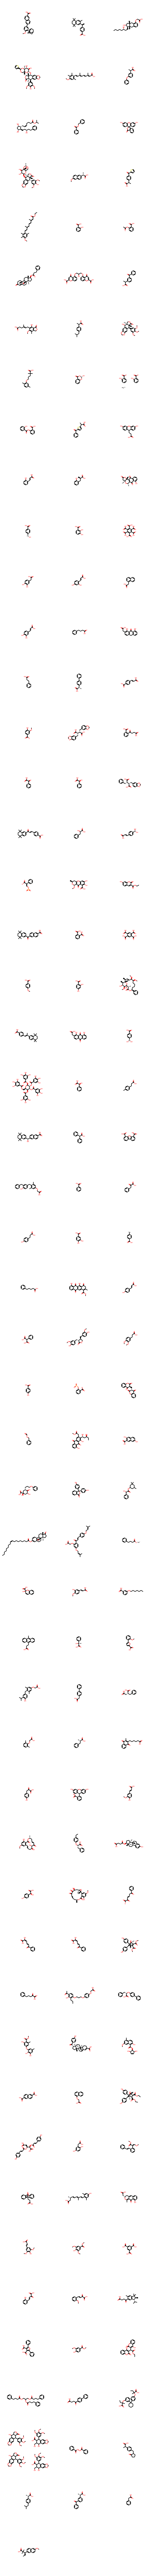

In [74]:
Draw.MolsToGridImage([drugbank[i] for i in aspirine_key_hits])

In [71]:
#neco, cim by mohl byt aspirin podgrafem
#zda ma dotazovana struktura nastaveny bit na 1 a ta druha tez na 1
def potential_superstructure(super_key, query_key):
    for s, q in zip(super_key, query_key):
        if q and not s:
            return False
    return True

In [72]:
aspirin_potential_superstruct = [i for i, key in enumerate(custom_struct_keys) 
                                 if potential_superstructure(key, aspirine_key)]
len(aspirin_potential_superstruct)

1322

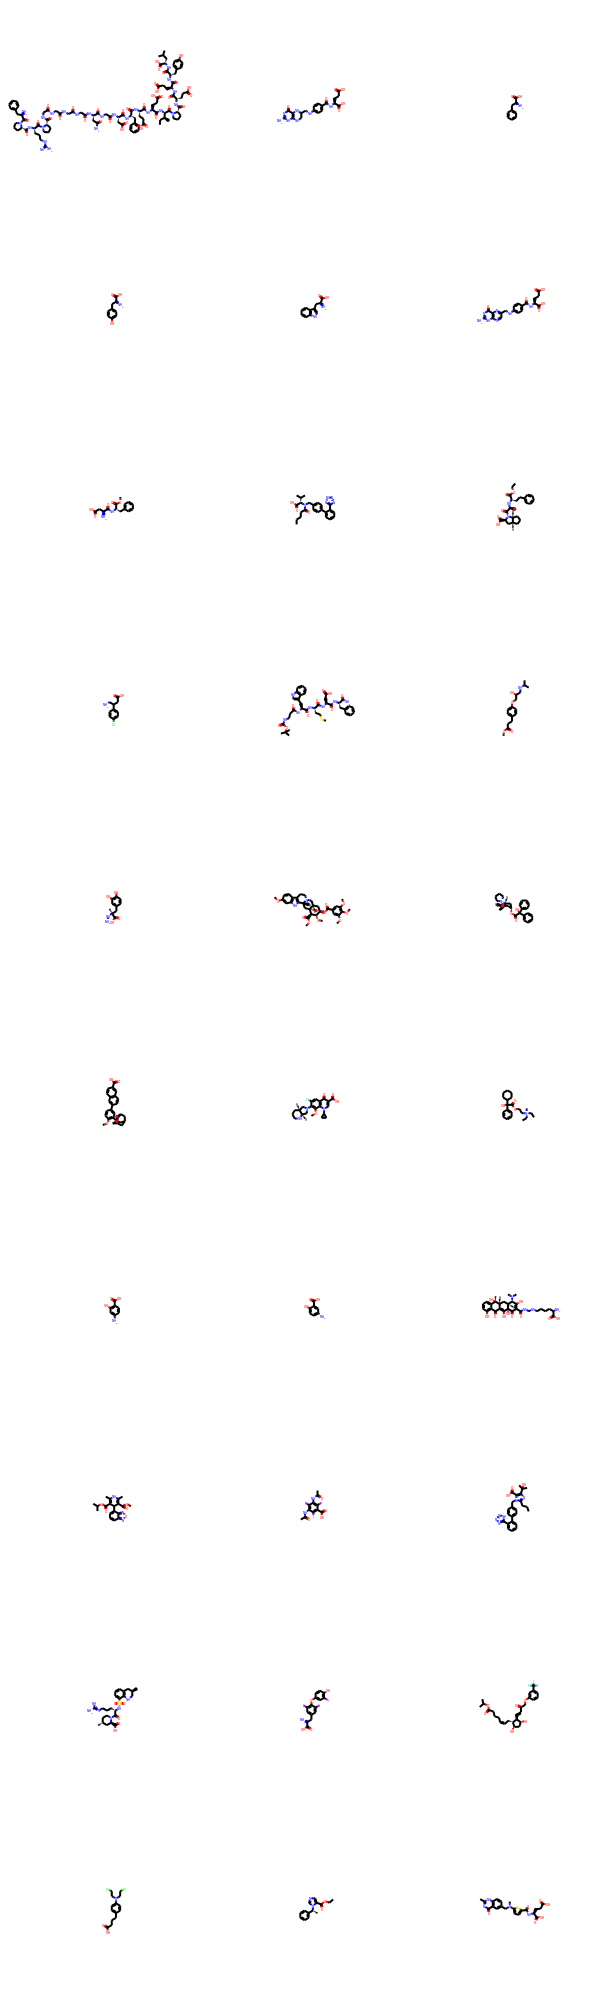

In [95]:
Draw.MolsToGridImage([drugbank[i] for i in aspirin_potential_superstruct[:30]])

# MACCs keys
- 1 z predefinovanych strukturnich klicu
- seznam SMARTS (podobne jako nas seznam)
- v C strukturach -> je to rychlejsi
- 166 verejne zpristupnenych
- i v rdkitu: from rdkit.Chem import MACCSkeys

In [80]:
drugbank_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drugbank]
drugbank_maccs[0] #obalena struktura reprezentujici vektor - v C

In [81]:
drugbank_maccs[0].GetOnBits()

In [83]:
#list(drugbank_maccs[0].GetOnBits()) #cisla zaplych bitu pro molekulu
tuple(drugbank_maccs[0].GetOnBits())

(25,
 43,
 53,
 54,
 74,
 75,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 85,
 90,
 91,
 92,
 95,
 96,
 97,
 100,
 104,
 106,
 110,
 111,
 113,
 114,
 115,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 125,
 127,
 128,
 129,
 131,
 132,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165)

## zkusit najit, zda je nejaka kolize:

### 1. stejny strukturni klic jako aspirin

In [84]:

aspirine_maccs = MACCSkeys.GenMACCSKeys(aspirine)
tuple(aspirine_maccs.GetOnBits())

(89,
 113,
 123,
 126,
 127,
 136,
 139,
 140,
 143,
 144,
 146,
 150,
 152,
 154,
 157,
 159,
 160,
 162,
 163,
 164,
 165)

In [86]:
aspirine_maccs_hits = [i for i, key in enumerate(drugbank_maccs) if key == aspirine_maccs]
len(aspirine_maccs_hits)

1

In [88]:
aspirine_maccs_hits

[824]

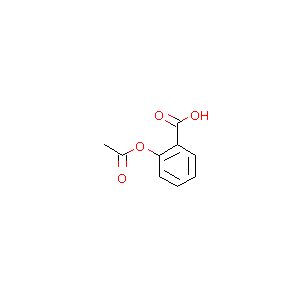

In [90]:
Draw.MolToImage(drugbank[824])

### 2. porovnani na urovni bitu ... superstruktura

In [91]:
#vyradime tu superstrukturu, ktere chybi bit
def potential_maccs_superstructure(super_key, query_key):
    for on_bit in query_key.GetOnBits(): #indexy zalych bitu v dotazovane strukture
        if not super_key.GetBit(on_bit): #hledame bity, ktere jsou v DB vyple ... spatna struktura -> vyrazena
            return False
    return True

In [92]:
aspirin_potential_maccs_superstruct = [i for i, key in enumerate(drugbank_maccs) 
                                       if potential_maccs_superstructure(key, aspirine_maccs)]
len(aspirin_potential_maccs_superstruct) #108 potencionalnich superstruktur

108

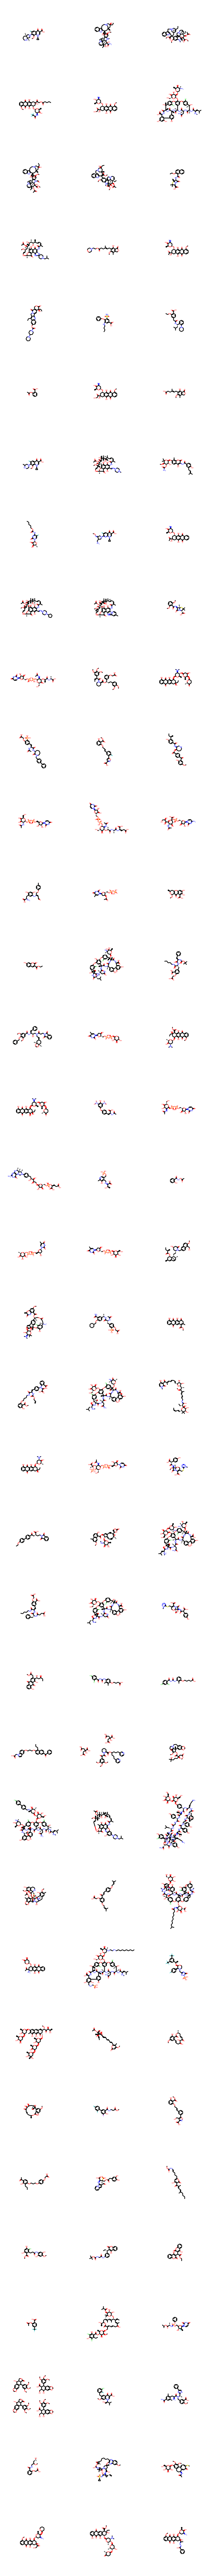

In [93]:
Draw.MolsToGridImage([drugbank[i] for i in aspirin_potential_maccs_superstruct])